In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



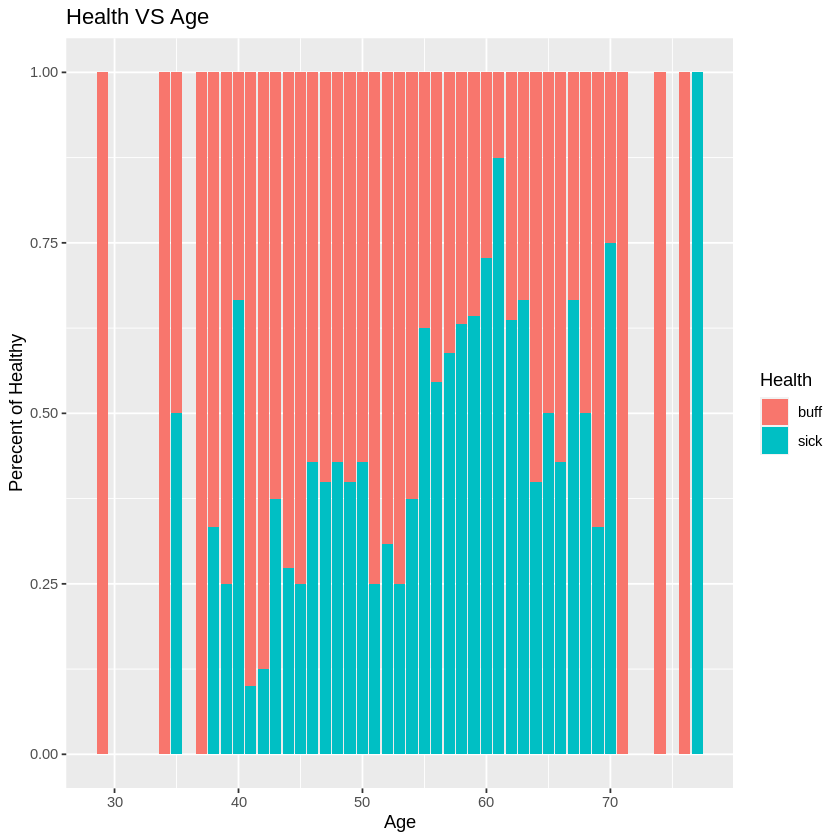

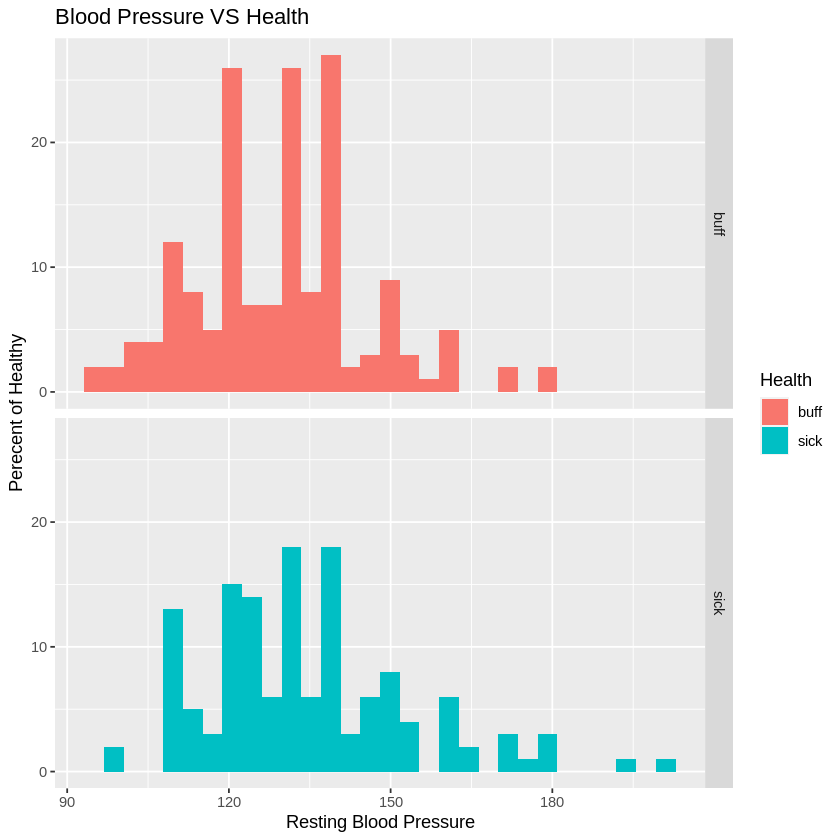

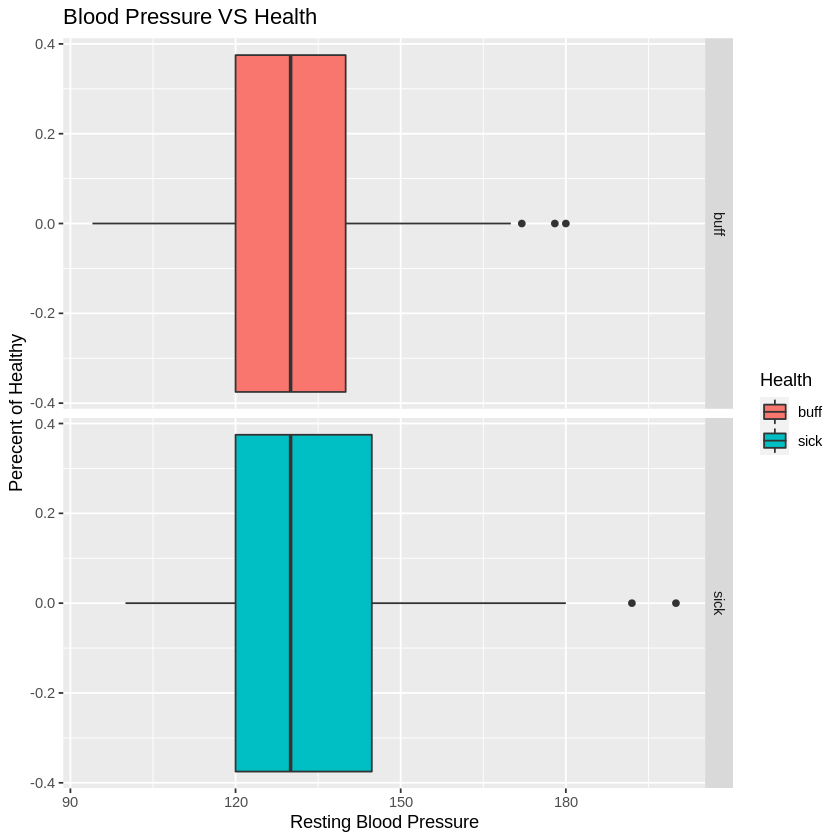

In [34]:
data <- read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod", skip = 19, col_names=FALSE) 
colnames(data) <- c("age", "sex", "chest_pain_type", "resting_blood_pres", "cholesteral", "fasting_blood_sugar < 120", "resting_ecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "number_of_vessels_colored", "thal", "healthy_or_sick", "sickness_classifier")
data_selected <- data |>
    select("age", "resting_blood_pres", "cholesteral", "max_heart_rate", "oldpeak", "number_of_vessels_colored", "healthy_or_sick", "sickness_classifier")


age_plot <- data_selected |>
    ggplot(aes(x = age, fill = healthy_or_sick)) + 
    geom_bar(position = 'fill') + 
    xlab("Age") +
    ylab("Perecent of Healthy") +
    labs(fill = "Health") +
    ggtitle("Health VS Age")
age_plot

rbp_plot <- data_selected |>
    ggplot(aes(x = resting_blood_pres, fill = healthy_or_sick)) + 
    geom_histogram(position = 'identity') + 
    xlab("Resting Blood Pressure") +
    ylab("Perecent of Healthy") +
    labs(fill = "Health") +
    ggtitle("Blood Pressure VS Health") +
facet_grid(rows = vars(healthy_or_sick))
rbp_plot

rbp2_plot <- data_selected |>
    ggplot(aes(x = resting_blood_pres, fill = healthy_or_sick)) + 
    geom_boxplot(position = 'identity') + 
    xlab("Resting Blood Pressure") +
    ylab("Perecent of Healthy") +
    labs(fill = "Health") +
    ggtitle("Blood Pressure VS Health") +
facet_grid(rows = vars(healthy_or_sick))

rbp2_plot
